# Performance of steepest descent and conjugate gradient in 2D

$$\varphi(x)=\frac12 x^T A x - b^T x$$

where $A\in \mathbb{R}^2$ is PSD.

In [1]:
using LinearAlgebra

# Setup

V = qr(randn(2,2)).Q
D = [20.0,1.0]
A = V*diagm(0=>D)*V'
b = randn(2)

xexact = A\b;

0.

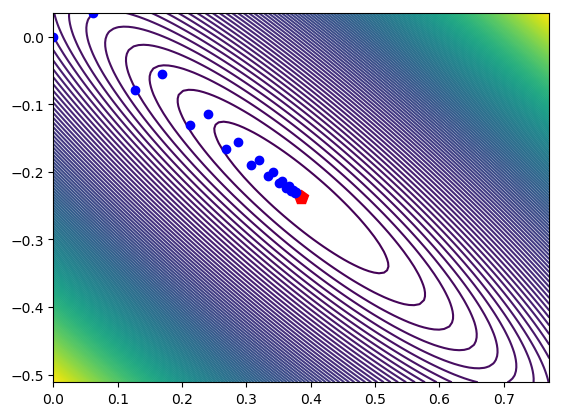

77087216922756560.00.035364256927497506-0.5113163151686115

In [2]:
# Steepest descent

function SD(A,b,x0,tol=1e-5,maxiter=1000)
    N = length(b)
    x = copy(x0)
    r = b - A * x
    nrmr = r' * r
    
    xhist = zeros(N,maxiter)
    iter = 0
    xhist[:,1] = x0
    while(iter < maxiter-1)
        iter += 1
        Ar = A * r
        alpha = nrmr / (r' * Ar)
        x = x + alpha * r
        r = r - alpha * Ar
        nrmrnew  = r' * r;
        xhist[:,iter+1] = x
        if sqrt(nrmrnew) < tol
            break
        end
        nrmr = nrmrnew
    end
    xhist = xhist[:,1:iter+1]
    return xhist
end

x0 = zeros(2)
xhist = SD(A,b,x0,1e-6,20)

xspan = maximum(abs.(xhist[1,:] .- xexact[1]))
yspan = maximum(abs.(xhist[2,:] .- xexact[2]))

xmin = xexact[1] + xspan
xmax = xexact[1] - xspan 
ymin = xexact[2] + yspan
ymax = xexact[2] - yspan


using PyPlot
Ngrid = 100
xgrid = LinRange(xmin,xmax,Ngrid)
ygrid = LinRange(ymin,ymax,Ngrid)
print(xmin,xmax,ymin,ymax)
phival = zeros(Ngrid,Ngrid)
for j = 1 : Ngrid
    for i = 1 : Ngrid
        x2d = [xgrid[i],ygrid[j]];
        phival[i,j] = 0.5*x2d'*A*x2d - b'*x2d
    end
end

figure(1)
# Note the use of transpose.
contour(xgrid,ygrid,phival',200)
iter = size(xhist,2)
plot(xexact[1],xexact[2],"rp",markersize=10)
for i = 1 : iter
    plot(xhist[1,i],xhist[2,i],"bo")
end


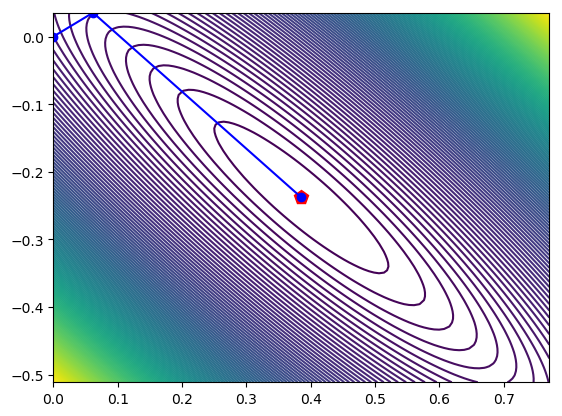

p1'*p0 = 0.20620367947921733
p1'*A*p0 = 3.885780586188048e-15


In [3]:
# Conjugate gradient, the first two steps


x0 = zeros(2)
r0 = b - A * x0
p0 = r0
alpha0 = r0'*r0 / (p0' * (A*p0))
x1 = x0 + alpha0 * p0
r1 = b - A * x1
p1 = r1 + r1'*r1 / (r0'*r0) * p0
alpha1 = r1'*r1 / (p1' * (A*p1))
x2 = x1 + alpha1 * p1



figure(1)
# Note the use of transpose.
contour(xgrid,ygrid,phival',200)
iter = size(xhist,2)
plot(xexact[1],xexact[2],"rp",markersize=10)

plot([x0[1],x1[1],x2[1]],[x0[2],x1[2],x2[2]],"b-o")

println("p1'*p0 = ", p1'*p0)
println("p1'*A*p0 = ", p1'*A*p0)
